# Load our cleaned data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

data = pd.read_csv(r'..\data\processed\cleaned-data.csv')
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,1,0,Yes
1,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,1,0,Yes
2,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,1,1,Yes
3,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,1,0,Yes
4,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,1,0,Yes


In [2]:
data.shape

(72489, 12)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72489 entries, 0 to 72488
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          72489 non-null  object
 1   ScheduledDay    72489 non-null  object
 2   AppointmentDay  72489 non-null  object
 3   Age             72489 non-null  int64 
 4   Neighbourhood   72489 non-null  object
 5   Scholarship     72489 non-null  int64 
 6   Hipertension    72489 non-null  int64 
 7   Diabetes        72489 non-null  int64 
 8   Alcoholism      72489 non-null  int64 
 9   Handcap         72489 non-null  int64 
 10  SMS_received    72489 non-null  int64 
 11  No-show         72489 non-null  object
dtypes: int64(7), object(5)
memory usage: 6.6+ MB


In [4]:
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,72489.000000,72489.000000,72489.000000,72489.000000,72489.000000,72489.000000,72489.000000
mean,38.457863,0.102071,0.202527,0.075336,0.027273,0.979528,0.344645
std,22.557464,0.302743,0.401886,0.263934,0.162879,0.141609,0.475256
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


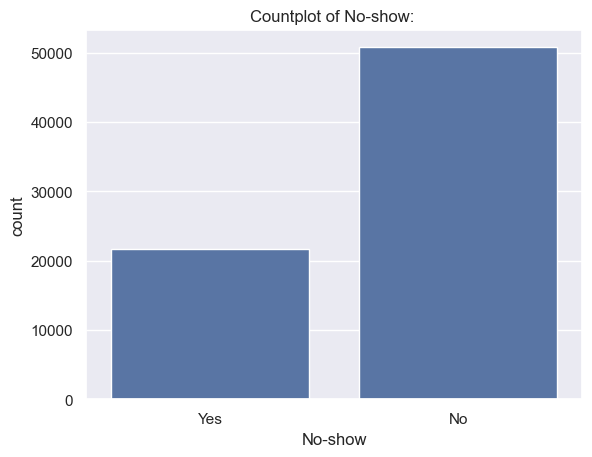

In [5]:
sns.countplot(x=data['No-show'])
plt.title("Countplot of No-show: ")
plt.show()

- So we have more patients who take appointments on time compared to others patients who are not taking appointments at right time.

<Axes: xlabel='Gender', ylabel='count'>

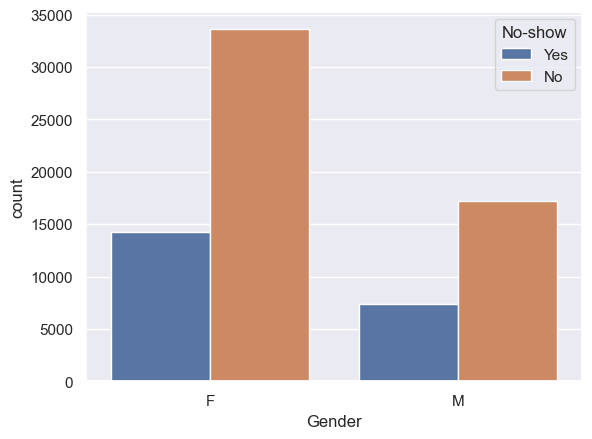

In [6]:
sns.countplot(data, x='Gender', hue='No-show')

- As you can see both men and women are equally responsible for not taking the appointment on time.

<Axes: xlabel='Scholarship', ylabel='count'>

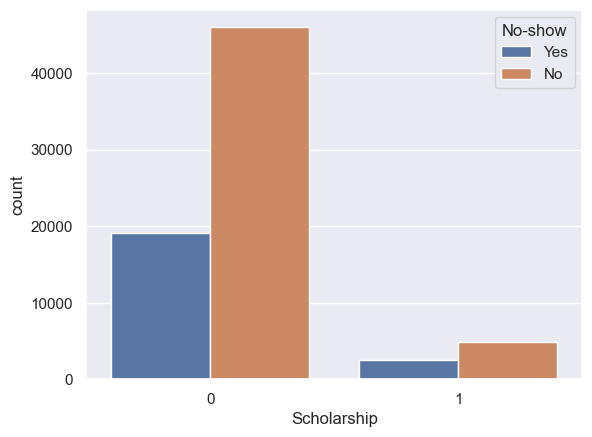

In [7]:
sns.countplot(data, x='Scholarship', hue='No-show')

- So, most of the patients don't have any scholarship from the government, so the patients who have scholarship from the government have more chances to get the appointment on time.

<Axes: xlabel='Diabetes', ylabel='count'>

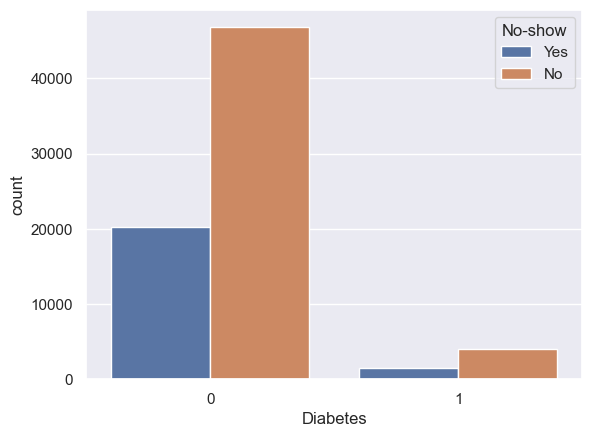

In [8]:
sns.countplot(data, x='Diabetes', hue='No-show')

- So we can clearly see that if a patient has **diabetes**, he or she is `more likely` to attend an appointment on time.

<Axes: xlabel='Alcoholism', ylabel='count'>

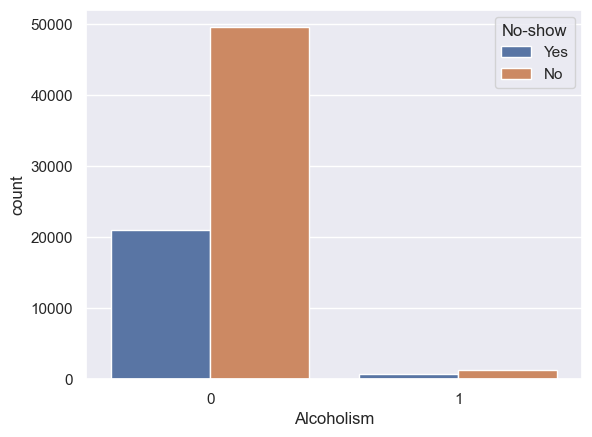

In [9]:
sns.countplot(data, x='Alcoholism', hue='No-show')

<Axes: xlabel='SMS_received', ylabel='count'>

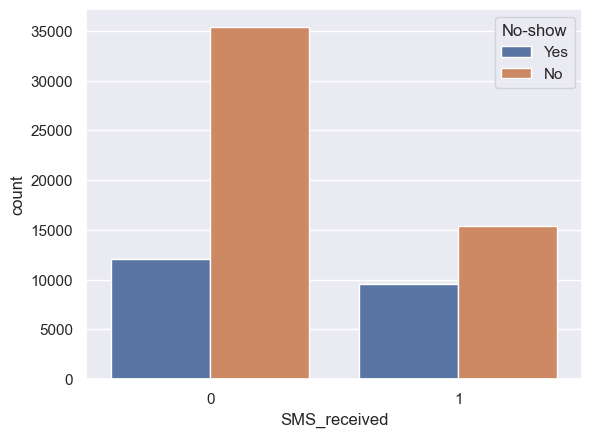

In [10]:
sns.countplot(data, x='SMS_received', hue='No-show')

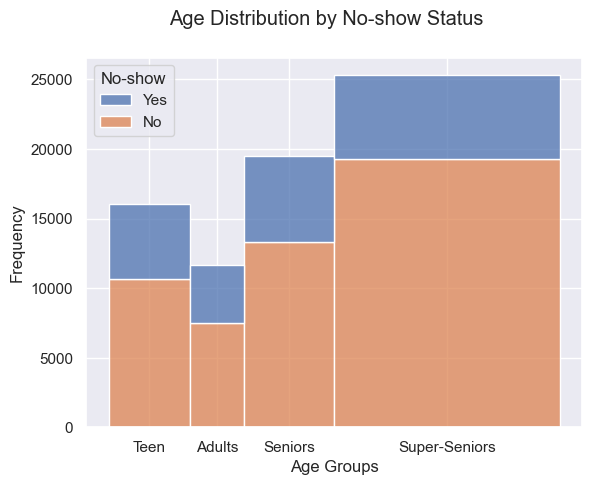

In [11]:
sns.histplot(data=data, x="Age", bins=[0, 18, 30, 50, 100], hue='No-show', multiple='stack')
plt.xticks([9, 24, 40, 75], ['Teen', 'Adults', 'Seniors', 'Super-Seniors'])
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.suptitle("Age Distribution by No-show Status") 
plt.show()

- So as you can see that, `super-senior` are more aware of time.

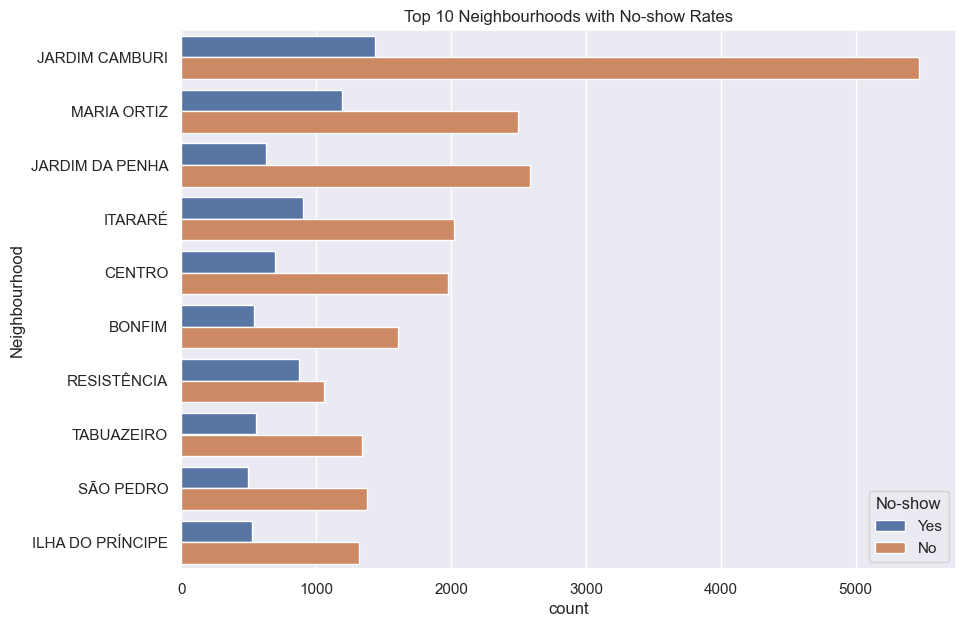

In [12]:
plt.figure(figsize=(10,7))
order = data['Neighbourhood'].value_counts().index
sns.countplot(data=data, y='Neighbourhood', hue='No-show', order=order[:10])
plt.title("Top 10 Neighbourhoods with No-show Rates")
plt.show()

In [13]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['WaitingDays'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

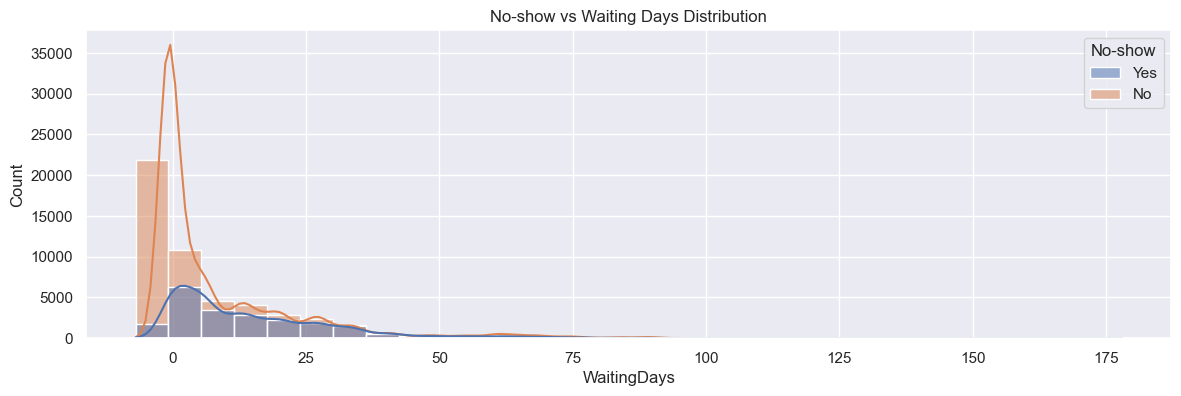

In [14]:
plt.figure(figsize=(14,4))
sns.histplot(data=data, x='WaitingDays', hue='No-show', bins=30, kde=True)
plt.title("No-show vs Waiting Days Distribution")
plt.show()

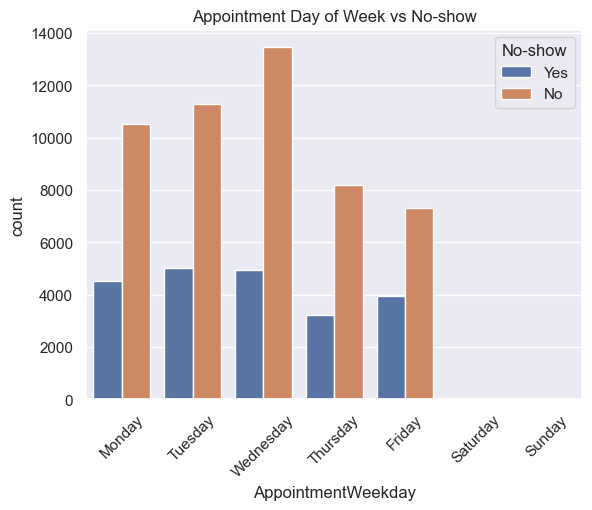

In [15]:
data['AppointmentWeekday'] = data['AppointmentDay'].dt.day_name()

sns.countplot(data=data, x='AppointmentWeekday', hue='No-show',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45)
plt.title("Appointment Day of Week vs No-show")
plt.show()

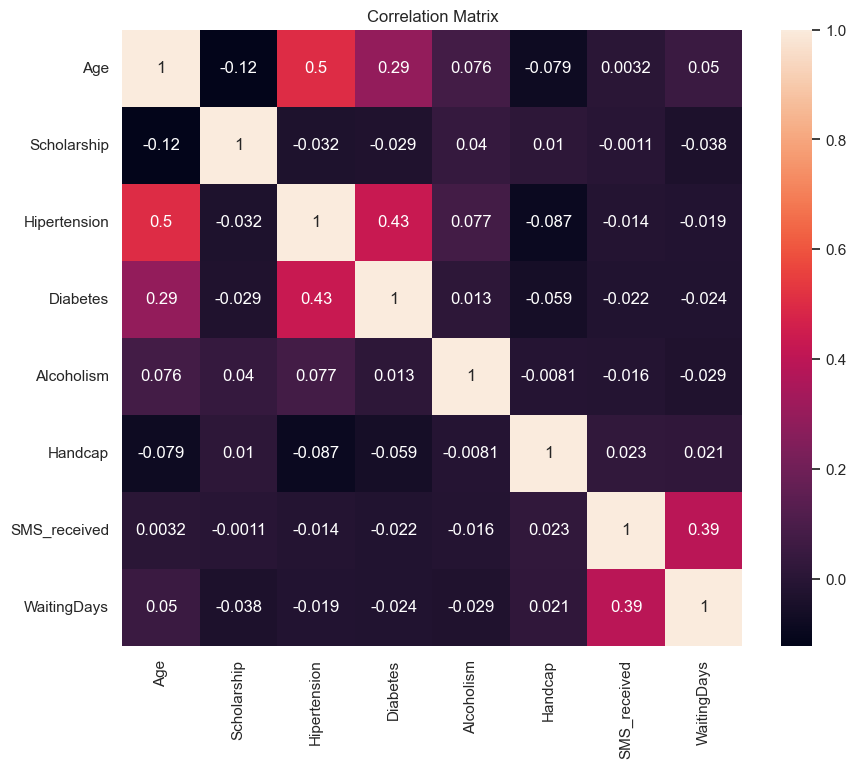

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, )
plt.title("Correlation Matrix")
plt.show()

## User behevior

<Axes: xlabel='Diabetes', ylabel='count'>

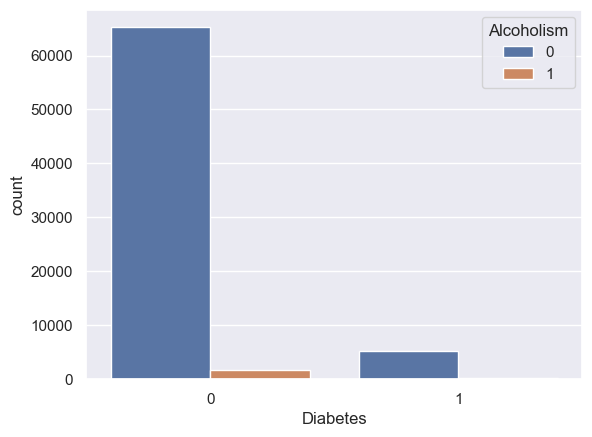

In [17]:
sns.countplot(data, x='Diabetes', hue='Alcoholism')

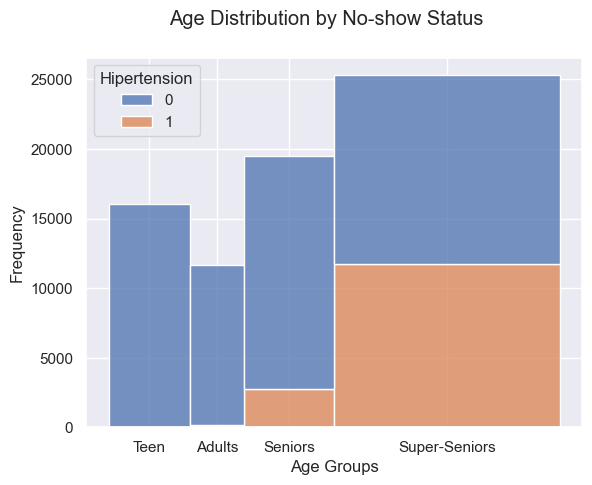

In [18]:
sns.histplot(data=data, x="Age", bins=[0, 18, 30, 50, 100], hue='Hipertension', multiple='stack')
plt.xticks([9, 24, 40, 75], ['Teen', 'Adults', 'Seniors', 'Super-Seniors'])
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.suptitle("Age Distribution by No-show Status") 
plt.show()

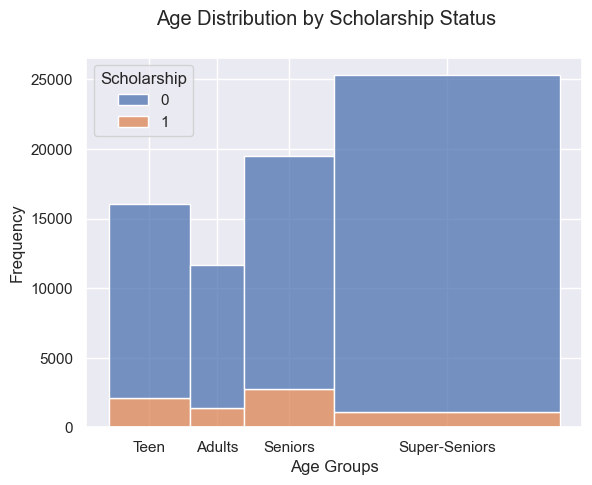

In [19]:
sns.histplot(data=data, x="Age", bins=[0, 18, 30, 50, 100], hue='Scholarship', multiple='stack')
plt.xticks([9, 24, 40, 75], ['Teen', 'Adults', 'Seniors', 'Super-Seniors'])
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.suptitle("Age Distribution by Scholarship Status") 
plt.show()

In [20]:
bins = [0, 18, 30, 50, 100]
labels = ['Teens', 'Adults', 'Seniors', 'Super-Seniors']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [ ]:
sns.barplot(data=data, x='AgeGroup', y='WaitingTime', hue='No-show', estimator='mean')